## Problem Statement : Classify Image as per Type like Bike,Car, Camel,Elephant,Horse,                                               Plane,Train, Truck, Ship, Autorishaw 

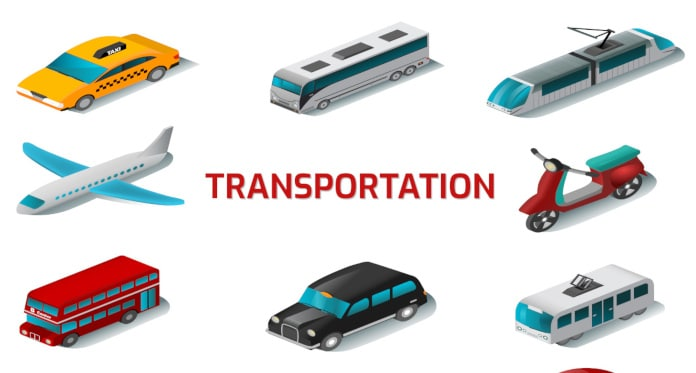

###### Import Required Libraries

In [1]:
import pyforest
import tensorflow as tf
import keras
import cv2
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

##### Make path for input Images

In [2]:
import os
path1= r"D:\Automobile NLP"
auto=['0bike','1Camel','2car','3elephant','4horse','5plane','6ship','7train','8truck','9autorikshaw']

##### Import Image data as per Category
### Here we putting X variables in form of Images by converting it in arrray format with shape of (200,200) along with Label

In [4]:
image_size=200 # Its not mandetory 200 but important
input_image=[]

for i in auto:
    folders= os.path.join(path1,i)
    label = auto.index(i)    # We need to tell software that which one is cat and which one is dog
    for image in os.listdir(folders):
        image_path= os.path.join(folders, image)
        image_array = cv2.imread(image_path)
        image_array= cv2.resize(image_array, (image_size,image_size))  # Resizing image each one
        input_image.append([image_array, label])

In [5]:
len(input_image)

144

#### Separate X and y i.e. Target Variable

In [6]:
np.random.shuffle(input_image)
X=[]
y=[]

for X_values, labels in input_image:
    X.append(X_values)
    y.append(labels)

<IPython.core.display.Javascript object>

In [12]:
# since our X in form of list so convert it in Array
X = np.array(X)
Y= np.array(y)

X= X/255   # why 255 because its max pixcle

model= Sequential()
model.add(Conv2D(filters= 100, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(50, activation='relu', input_shape =X.shape[1:]))
model.add(Dropout(0.3)) 
model.add(Dense(10, activation='softmax'))  # Must change as per output categories

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
model.fit(X,Y,epochs=10)

Epoch 1/10
5/5 [==============================] - 9s 1s/step - loss: 2.3231 - accuracy: 0.1042
Epoch 2/10
5/5 [==============================] - 5s 1s/step - loss: 2.2884 - accuracy: 0.1528
Epoch 3/10
5/5 [==============================] - 5s 1s/step - loss: 2.2390 - accuracy: 0.1667
Epoch 4/10
5/5 [==============================] - 6s 1s/step - loss: 2.2596 - accuracy: 0.2083
Epoch 5/10
5/5 [==============================] - 6s 1s/step - loss: 2.2393 - accuracy: 0.1597
Epoch 6/10
5/5 [==============================] - 6s 1s/step - loss: 2.1775 - accuracy: 0.2431
Epoch 7/10
5/5 [==============================] - 5s 1s/step - loss: 2.1248 - accuracy: 0.2292
Epoch 8/10
5/5 [==============================] - 5s 1s/step - loss: 2.0474 - accuracy: 0.2153
Epoch 9/10
5/5 [==============================] - 6s 1s/step - loss: 2.0540 - accuracy: 0.3264
Epoch 10/10
5/5 [==============================] - 5s 1s/step - loss: 2.0304 - accuracy: 0.2847


In [17]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_scoreuracy_score
predict = model.predict(X) # Predicion in probability and fetch the position of the highest prob
classes_x = np.argmax(predict,axis=1)

<IPython.core.display.Javascript object>

In [16]:
con=confusion_matrix(classes_x,Y)
con

array([[16,  2,  2,  6,  4,  6,  2,  3,  5,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 13,  7,  6,  1,  6,  6,  6,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  7,  3,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  2,  4,  1,  4,  6,  3,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  4]], dtype=int64)

In [19]:
accuracy_score(Y,classes_x)

0.3194444444444444